In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

<AxesSubplot:xlabel='X', ylabel='Y'>

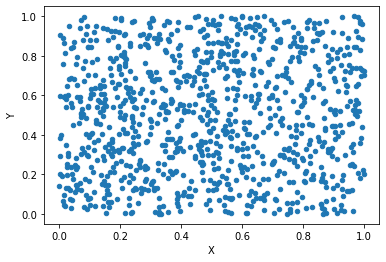

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_XY = pd.DataFrame(columns = ["X","Y"])
df_XY.X = X
df_XY.Y = Y
df_XY.plot(x = "X", y = "Y", kind = "scatter")

In [3]:
X = np.random.uniform(0,1,1000)
X

array([5.93267374e-01, 8.13486134e-01, 5.59934938e-01, 9.01312699e-01,
       4.73564996e-01, 8.22648383e-02, 3.92629151e-01, 7.46036662e-01,
       7.84079393e-01, 4.06077967e-01, 2.18824474e-02, 7.97452321e-01,
       6.62006691e-01, 3.70933466e-01, 2.21235741e-01, 2.63863055e-01,
       6.66735014e-01, 3.97054871e-01, 9.40997062e-01, 5.17541926e-01,
       5.83723374e-01, 4.68364405e-01, 8.37699126e-01, 7.96241282e-01,
       8.87460977e-01, 4.86328896e-01, 1.89824193e-01, 7.34891204e-01,
       7.83592787e-01, 8.40776230e-01, 5.75382504e-01, 8.74441293e-02,
       2.59824059e-01, 8.92771490e-01, 7.94501563e-01, 8.23277710e-01,
       7.74889583e-01, 8.45664464e-01, 7.75193128e-01, 8.98512503e-01,
       5.51227139e-01, 9.45008550e-02, 6.66184233e-01, 6.57985248e-01,
       3.98573150e-01, 5.16304782e-01, 8.57519527e-01, 5.18906759e-01,
       9.85505935e-02, 7.31509316e-01, 9.06207629e-01, 2.51324633e-01,
       9.63574451e-01, 8.51103184e-01, 7.93305023e-01, 1.56996518e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

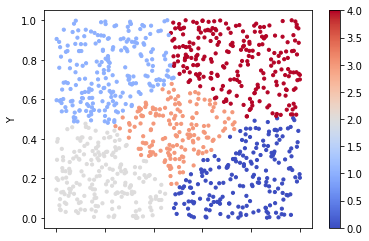

In [4]:
model1 = KMeans(n_clusters = 5).fit(df_XY)

df_XY.plot(x="X", y="Y", c=model1.labels_, kind="scatter", s=10, cmap=plt.cm.coolwarm)

In [5]:
Univ = pd.read_csv("Universities.csv")

In [6]:
# Normalization function
def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return(x)

df_norm = norm_func(Univ.iloc[:,1:])
df_norm.head(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


# Elbow Curve

C:\Users\Bharadwaj\anaconda3-updated\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


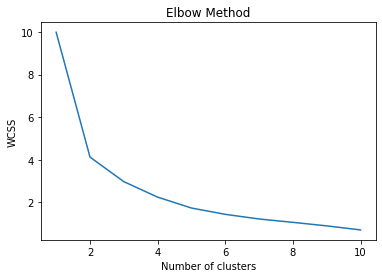

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Selecting 5 clusters from the above as it is optimal number of clusters
model = KMeans(n_clusters = 4)
model.fit(df_norm)

model.labels_ #getting labels of clusters assigned to each row

array([0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [14]:
# Converting numpy array into pandas series object
md = pd.Series(model.labels_)
# Creating a new column and assigning it to new column
Univ['clust'] = md
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [15]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000
